In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import metrics

%matplotlib inline

Using TensorFlow backend.


In [2]:
test = np.ones((1,5)).T
print(test.shape)

(97,256,256,3)

(5, 1)


(97, 256, 256, 3)

In [11]:

hf = h5py.File('datatest1.h5', 'r')
x_orig = np.array(hf.get('dataset_1'))
y_orig = np.ones((1,x_orig.shape[0])).T

print('x_orig.shape=',x_orig.shape)
print('y_orig.shape=',y_orig.shape)
#print(x_orig)
#print(y_orig)

hf = h5py.File('datatest2.h5', 'r')
not_x_orig = np.array(hf.get('dataset_1'))
not_y_orig = np.zeros((1,not_x_orig.shape[0])).T

print('not_x_orig.shape=',not_x_orig.shape)
print('not_y_orig.shape=',not_y_orig.shape)



print('\r\n\r\ntrain_set and test_set')
train_num = int(x_orig.shape[0]*0.8)
train_num_not = int(not_x_orig.shape[0]*0.8)


train_x = np.vstack((x_orig[:train_num],not_x_orig[:train_num_not]))
train_y = np.vstack((y_orig[:train_num],not_y_orig[:train_num_not]))



test_x = np.vstack((x_orig[train_num:],not_x_orig[train_num_not:]))
test_y = np.vstack((y_orig[train_num:],not_y_orig[train_num_not:]))

#add radmon to the test,training
indices = np.arange(train_x.shape[0])
np.random.shuffle(indices)

train_x = train_x[indices]
train_y = train_y[indices]

indices = np.arange(test_x.shape[0])
np.random.shuffle(indices)

test_x = test_x[indices]
test_y = test_y[indices]

print('train_x.shape=',train_x.shape)
print('train_y.shape=',train_y.shape)
print('test_x.shape=',test_x.shape)
print('test_y.shape=',test_y.shape)

x_orig.shape= (97, 256, 256, 3)
y_orig.shape= (97, 1)
not_x_orig.shape= (76, 256, 256, 3)
not_y_orig.shape= (76, 1)


train_set and test_set
train_x.shape= (137, 256, 256, 3)
train_y.shape= (137, 1)
test_x.shape= (36, 256, 256, 3)
test_y.shape= (36, 1)


In [12]:
X_train = train_x.reshape(train_x.shape[0],-1)/255
Y_train = train_y
X_test = test_x.reshape(test_x.shape[0],-1)/255
Y_test = test_y

print('X_train.shape=',X_train.shape)
print('Y_train.shape=',Y_train.shape)
print('X_test.shape=',X_test.shape)
print('Y_test.shape=',Y_test.shape)

X_train.shape= (137, 196608)
Y_train.shape= (137, 1)
X_test.shape= (36, 196608)
Y_test.shape= (36, 1)


In [13]:
def createModel():
    model = Sequential()
    model.add(Dense(128,input_shape=(196608,)))
    model.add(Activation('relu')) 
    #model.add(Dropout(0.2))   
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(Activation('relu'))
    
    model.add(Dense(4))
    model.add(Activation('relu'))
    
    #model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid')) 

    return model

m = createModel()
#m.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
m.compile(loss='mean_squared_error', optimizer='sgd',metrics=['accuracy'])

In [25]:
m.fit(X_train, Y_train,batch_size=8, epochs=20,verbose=1, validation_data=(X_test, Y_test))

Train on 137 samples, validate on 36 samples
Epoch 1/20
137/137 [==============================] - 4s - loss: 0.4357 - acc: 0.5620 - val_loss: 0.4377 - val_acc: 0.5556
Epoch 2/20
137/137 [==============================] - 4s - loss: 0.4325 - acc: 0.5620 - val_loss: 0.4213 - val_acc: 0.5556
Epoch 3/20
137/137 [==============================] - 4s - loss: 0.3328 - acc: 0.5839 - val_loss: 0.2136 - val_acc: 0.6944
Epoch 4/20
137/137 [==============================] - 4s - loss: 0.1561 - acc: 0.8613 - val_loss: 0.2423 - val_acc: 0.6389
Epoch 5/20
137/137 [==============================] - 4s - loss: 0.1653 - acc: 0.8175 - val_loss: 0.2283 - val_acc: 0.6944
Epoch 6/20
137/137 [==============================] - 4s - loss: 0.1490 - acc: 0.8759 - val_loss: 0.2185 - val_acc: 0.7222
Epoch 7/20
137/137 [==============================] - 4s - loss: 0.1374 - acc: 0.8905 - val_loss: 0.3165 - val_acc: 0.5833
Epoch 8/20
137/137 [==============================] - 4s - loss: 0.1613 - acc: 0.8540 - val_lo

36/36 [==============================] - 0s     


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[ 1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.
   1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.]]
(256, 256, 3)

error [4, 9, 13, 16, 17, 19, 21, 24, 25, 26, 28, 29, 30, 32, 33, 34] 16 36 0.5555555555555556


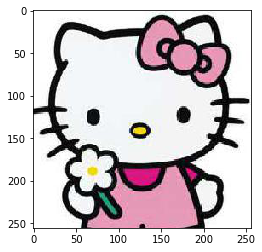

In [24]:
predicted_classes = m.predict_classes(X_test)

print("\r\n")
print(predicted_classes.T)
print((Y_test.T))


print(x_orig[train_num+2].shape)


pairwise = zip (predicted_classes.T[0], Y_test.T[0])
not_matched_digits = [idx for idx, pair in enumerate(pairwise) if pair[0] != int(pair[1])]
print("\r\nerror",not_matched_digits, len(not_matched_digits),X_test.shape[0], (X_test.shape[0]-len(not_matched_digits))/X_test.shape[0])

plt.imshow(x_orig[train_num+2])

In [ ]:
#Next is to create your own image


In [ ]:
#not finished yet ,just a sample

my_images = ["catA.jpg","cat2.jpg","cat3.jpg","cat1.jpg","cat5.jpg","dog1.jpg" ,"dog2.jpg","dog5.jpg","dog3.jpg","dog4.jpg"]
pos = 1
rows = len(my_images)/2

plt.figure(figsize=(20,20))

for my_image in my_images:
    ## END CODE HERE ##
    num_px = 64
    num_px = 64

    # We preprocess the image to fit your algorithm.
    fname = "images/" + my_image
    image = np.array(ndimage.imread(fname, flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px,num_px,3)).reshape((1, num_px*num_px*3)).T

    my_predicted_image = m.predict(my_image.T)

    #round to 0.0x to control the float
    resulty = np.squeeze(np.round(my_predicted_image,0))
    print(my_predicted_image,"y=" + str(resulty))

    plt.subplot(rows,3,pos)
    plt.title(str(result[int(resulty)]))

    pos=pos+1
        
    plt.imshow(image)
    result=['none cat','a cat']
    print("The image you input is",str(result[int(resulty)]),"!\r\n")

plt.show()